In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 7.5)

def show(img):
    plt.imshow(img, cmap='gray')
    plt.show()

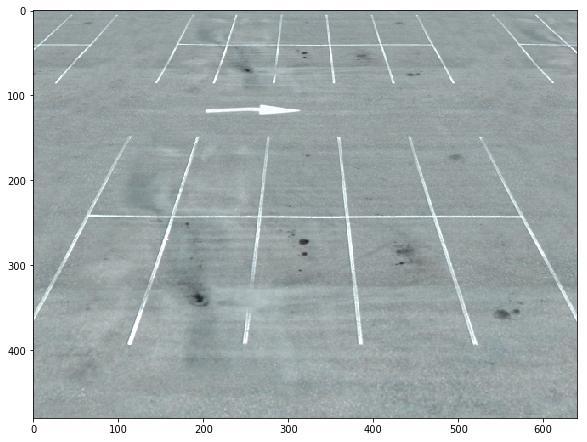

In [5]:
lot_img = cv2.imread('videos/lot.png')

show(lot_img)

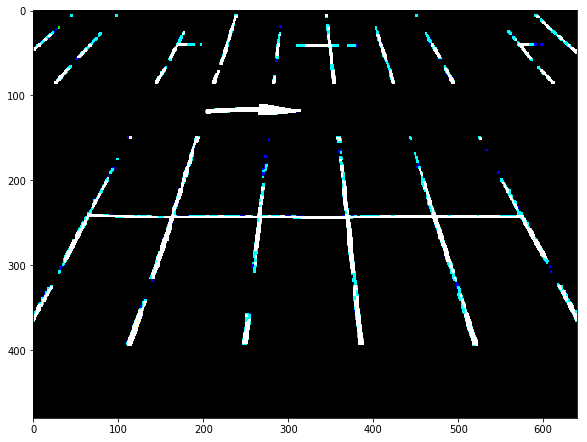

In [12]:
def process_frame(frame):
    
    ret, mask = cv2.threshold(frame, 220, 255, cv2.THRESH_BINARY)
    
    kernel = np.ones((3,3), np.uint8)
    img_dilation = cv2.dilate(mask, kernel, iterations=2)
    img_erosion = cv2.erode(img_dilation, kernel, iterations=1)
    
    return img_erosion

img = process_frame(lot_img)
show(img)

In [7]:
cap = cv2.VideoCapture('videos/test_countryroad.mp4')

In [8]:
while(cap.isOpened()):
    ret, frame = cap.read()
    
    if not ret:
        # restart video
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue
    
    key = cv2.waitKey(1)
    if key & 0xFF == ord('x'):
        cv2.destroyAllWindows()
        break
        
    
    img = process_frame(frame)
    
    cv2.imshow('frame', frame)
    cv2.imshow('img', img)